In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
results = pd.read_csv('results.csv')

results.head()

,log_instance,allowed_time,time_to_build_model,num_variables,num_constraints,total_solve_time,time_to_first_solution,first_solution_value,gap_to_optimum,best_solution_value,best_obj_15min,checker_total_objective
0,/data/storage/PRJ/C_11.json,900,170.45,35592,32565,731.24,352.799394,6765.050000,0.662036,6616.329412,"5749,957352",6470.718137
1,/data/storage/PRJ/A_set/A_04.json,900,187.28,510899,451917,142.42,97.481924,2467.851123,0.000134,2085.925753,"2085,876054",2085.925753
2,/data/storage/PRJ/A_set/A_08.json,900,2.21,11761,11777,898.70,0.943849,784.043824,0.130041,744.727059,"744,2932352",747.025588
3,/data/storage/PRJ/B_set_rounded/B_09.json,1800,15.13,14788,12190,1785.89,51.298781,11010.303571,0.788212,8272.970238,"7491,753571",8216.527381
4,/data/storage/PRJ/A_set/A_01.json,1800,4.91,31884,22615,2.77,1.874564,12816.342111,0.000115,1767.844222,"1767,815611",1767.844222


In [65]:
results['log_instance'] = results['log_instance'].apply(lambda x: x.split('/')[-1])
results['log_instance'] = results['log_instance'].apply(lambda x: x.split('.')[0])
#Rename the instance so that it is only the name of the instance


In [66]:
results.head()

,log_instance,allowed_time,time_to_build_model,num_variables,num_constraints,total_solve_time,time_to_first_solution,first_solution_value,gap_to_optimum,best_solution_value,best_obj_15min,checker_total_objective
0,C_11,900,170.45,35592,32565,731.24,352.799394,6765.050000,0.662036,6616.329412,"5749,957352",6470.718137
1,A_04,900,187.28,510899,451917,142.42,97.481924,2467.851123,0.000134,2085.925753,"2085,876054",2085.925753
2,A_08,900,2.21,11761,11777,898.70,0.943849,784.043824,0.130041,744.727059,"744,2932352",747.025588
3,B_09,1800,15.13,14788,12190,1785.89,51.298781,11010.303571,0.788212,8272.970238,"7491,753571",8216.527381
4,A_01,1800,4.91,31884,22615,2.77,1.874564,12816.342111,0.000115,1767.844222,"1767,815611",1767.844222


In [67]:
#print lines where checker total objective is not nan
results = results[results['checker_total_objective'].notna()]

<Axes: xlabel='log_instance'>

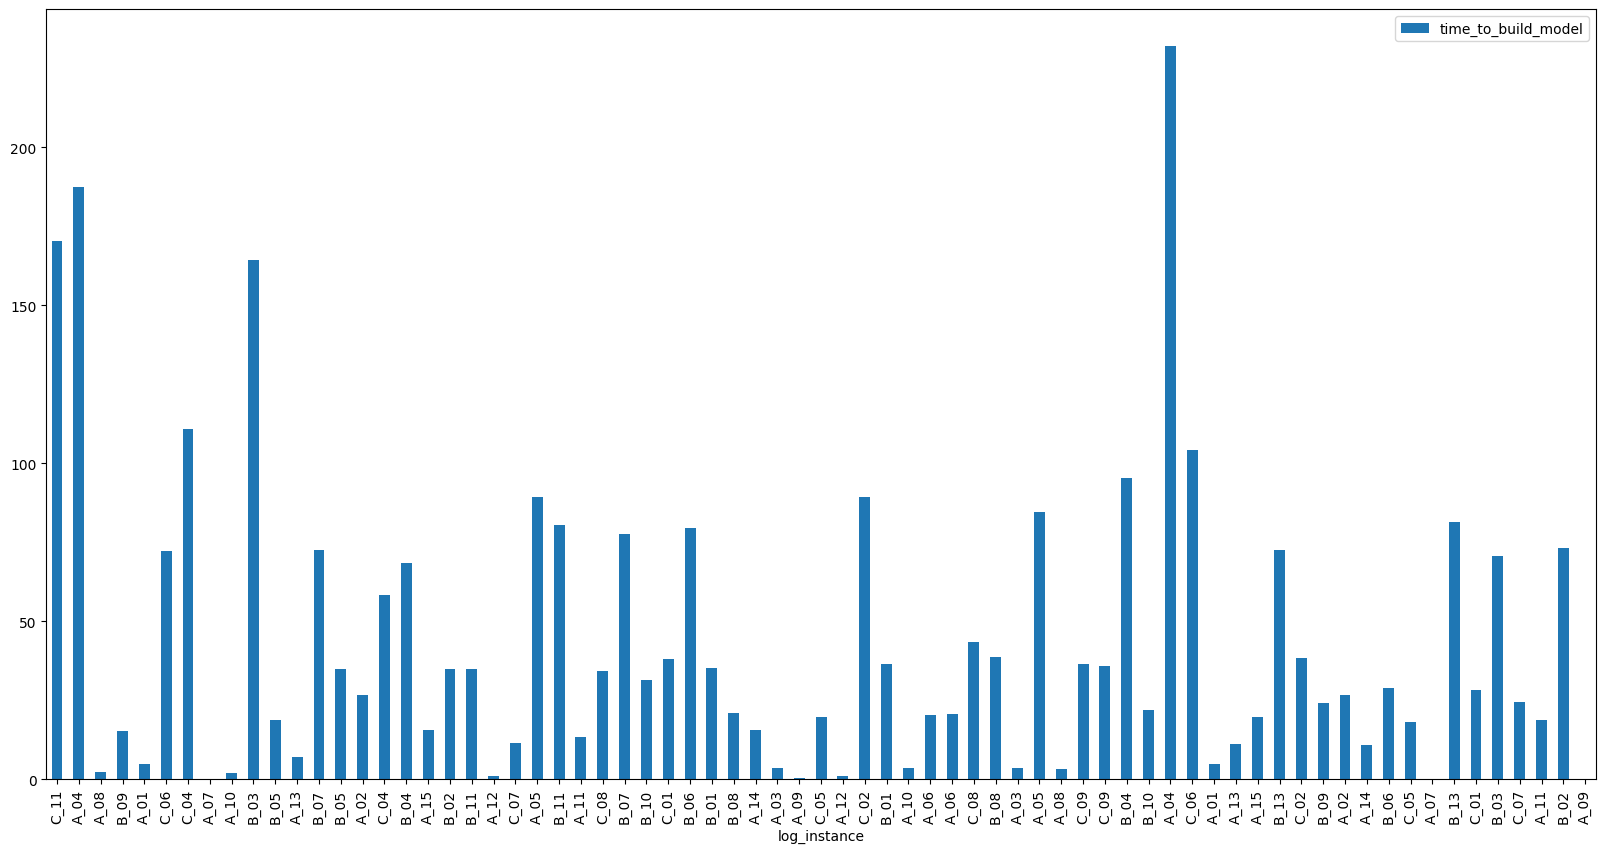

In [68]:
#plot the tilme needed to build the model
results.plot(x='log_instance', y='time_to_build_model', kind='bar', figsize=(20,10))

In [52]:
results.head()

,log_instance,allowed_time,time_to_build_model,num_variables,num_constraints,total_solve_time,time_to_first_solution,first_solution_value,gap_to_optimum,best_solution_value,best_obj_15min,checker_total_objective
0,C_11,900,170.45,35592,32565,731.24,352.799394,6765.050000,0.662036,6616.329412,"5749,957352",6470.718137
1,A_04,900,187.28,510899,451917,142.42,97.481924,2467.851123,0.000134,2085.925753,"2085,876054",2085.925753
2,A_08,900,2.21,11761,11777,898.70,0.943849,784.043824,0.130041,744.727059,"744,2932352",747.025588
3,B_09,1800,15.13,14788,12190,1785.89,51.298781,11010.303571,0.788212,8272.970238,"7491,753571",8216.527381
4,A_01,1800,4.91,31884,22615,2.77,1.874564,12816.342111,0.000115,1767.844222,"1767,815611",1767.844222


In [53]:
results_900 = results[results['allowed_time'] == 900]

In [55]:
#for eadh instance, where allowed time is 900, plot the percentage of difference from the best_obj_15min when checker_total_objective is used
results_900 = results_900.sort_values('log_instance')
results_900 = results_900.dropna(subset=['checker_total_objective'])

#replace ',' with '.' in the besy_obj_15min column
results_900['best_obj_15min'] = results_900['best_obj_15min'].apply(lambda x: x.replace(',', '.'))


#convert the best_obj_15min column to int
results_900['best_obj_15min'] = results_900['best_obj_15min'].apply(lambda x: float(x))


In [58]:

results_900['percentage_difference'] = (results_900['checker_total_objective'] - results_900['best_obj_15min'])/results_900['best_obj_15min'] * 100

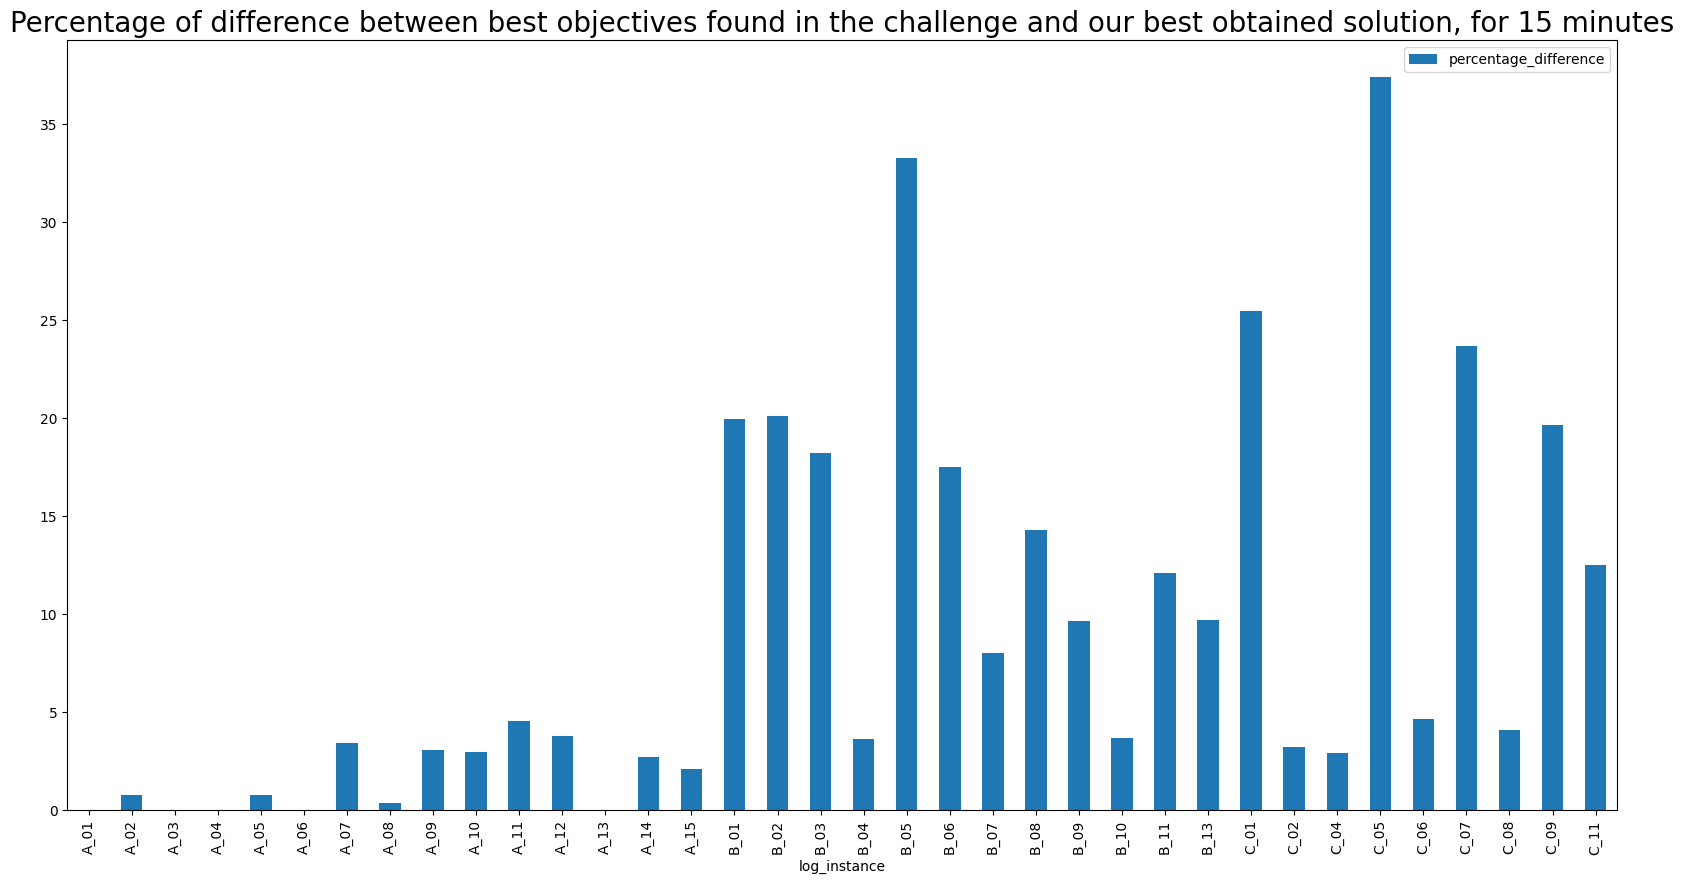

In [79]:
#plot the percentage difference for each instance
results_900.plot(x='log_instance', y='percentage_difference', kind='bar', figsize=(20,10), title="Percentage of difference between best objectives found in the challenge and our best obtained solution, for 15 minutes")
plt.title("Percentage of difference between best objectives found in the challenge and our best obtained solution, for 15 minutes", fontsize=20)

plt.show()

<Axes: xlabel='log_instance'>

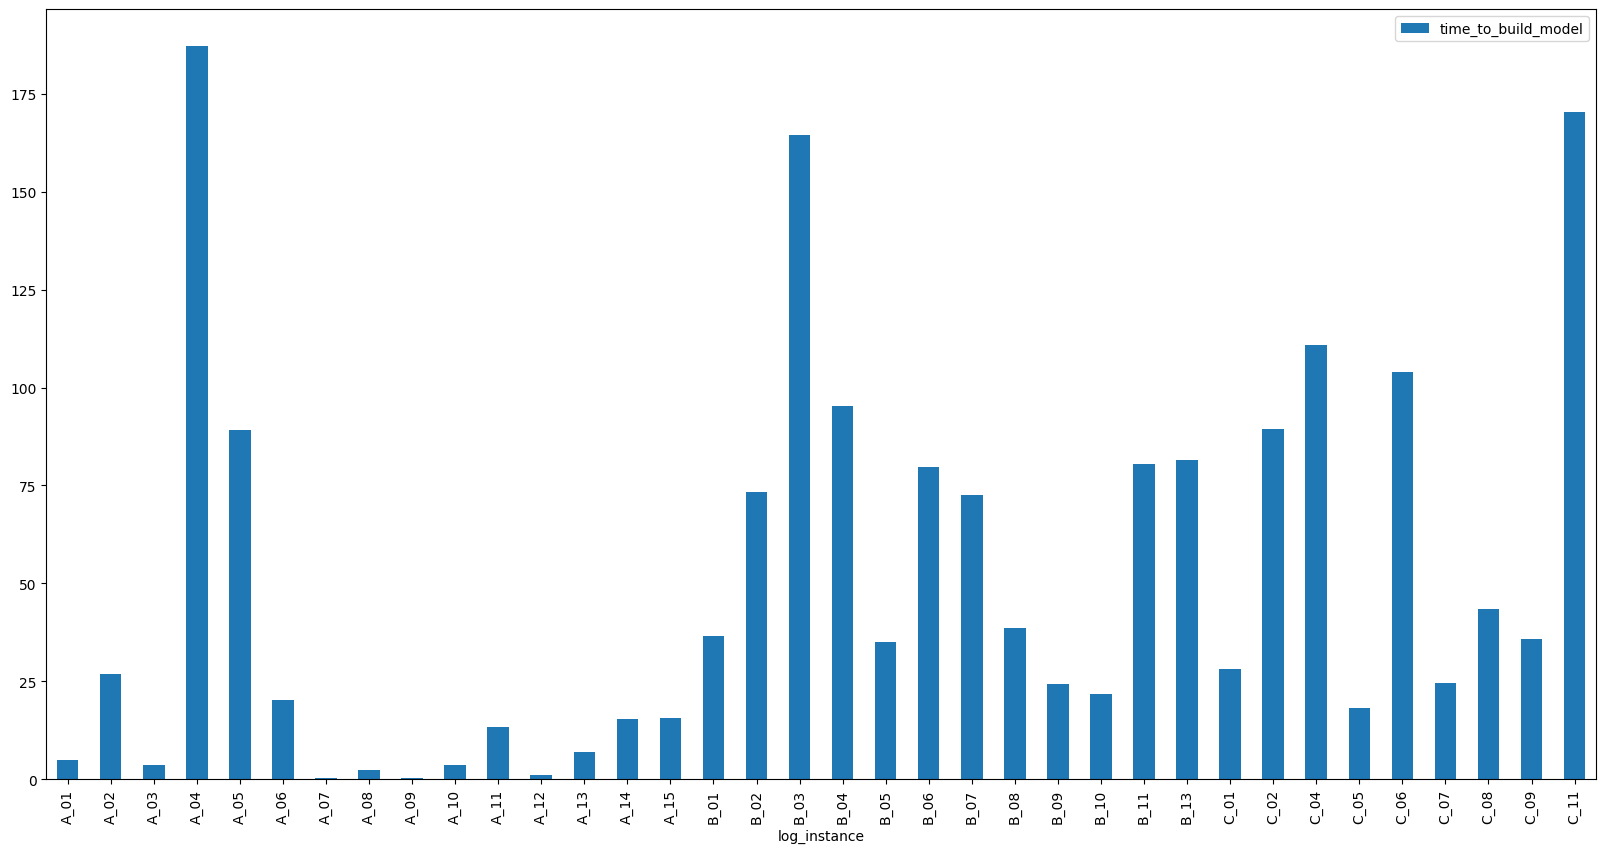

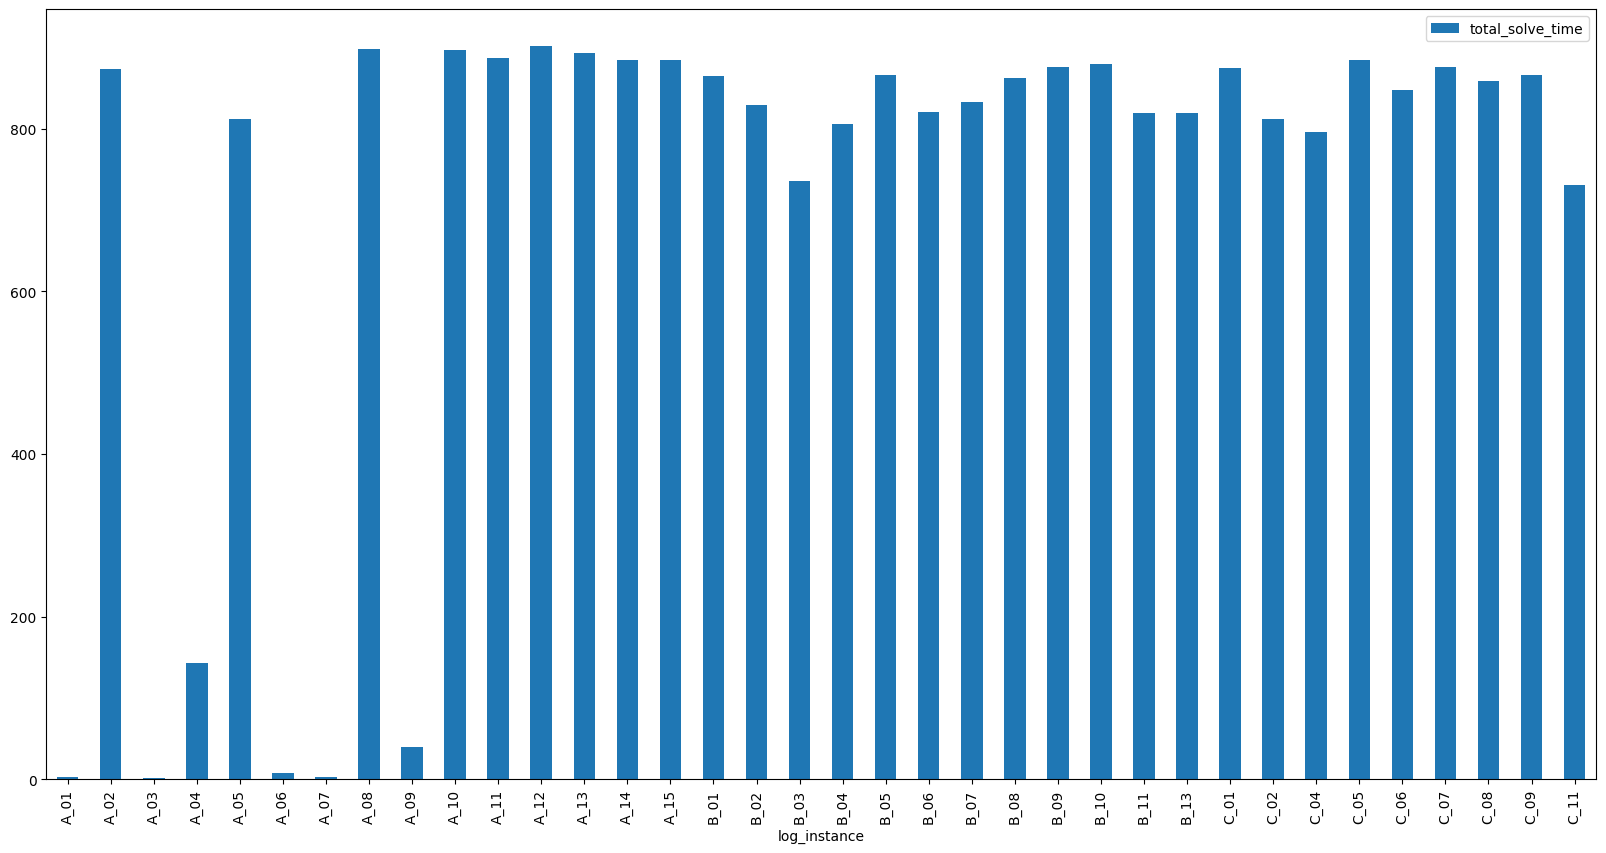

In [62]:
#plot the computation time for each instance, nbext to the time needed to build the model
results_900.plot(x='log_instance', y='time_to_build_model', kind='bar', figsize=(20,10))
results_900.plot(x='log_instance', y='total_solve_time', kind='bar', figsize=(20,10))

<Axes: xlabel='log_instance'>

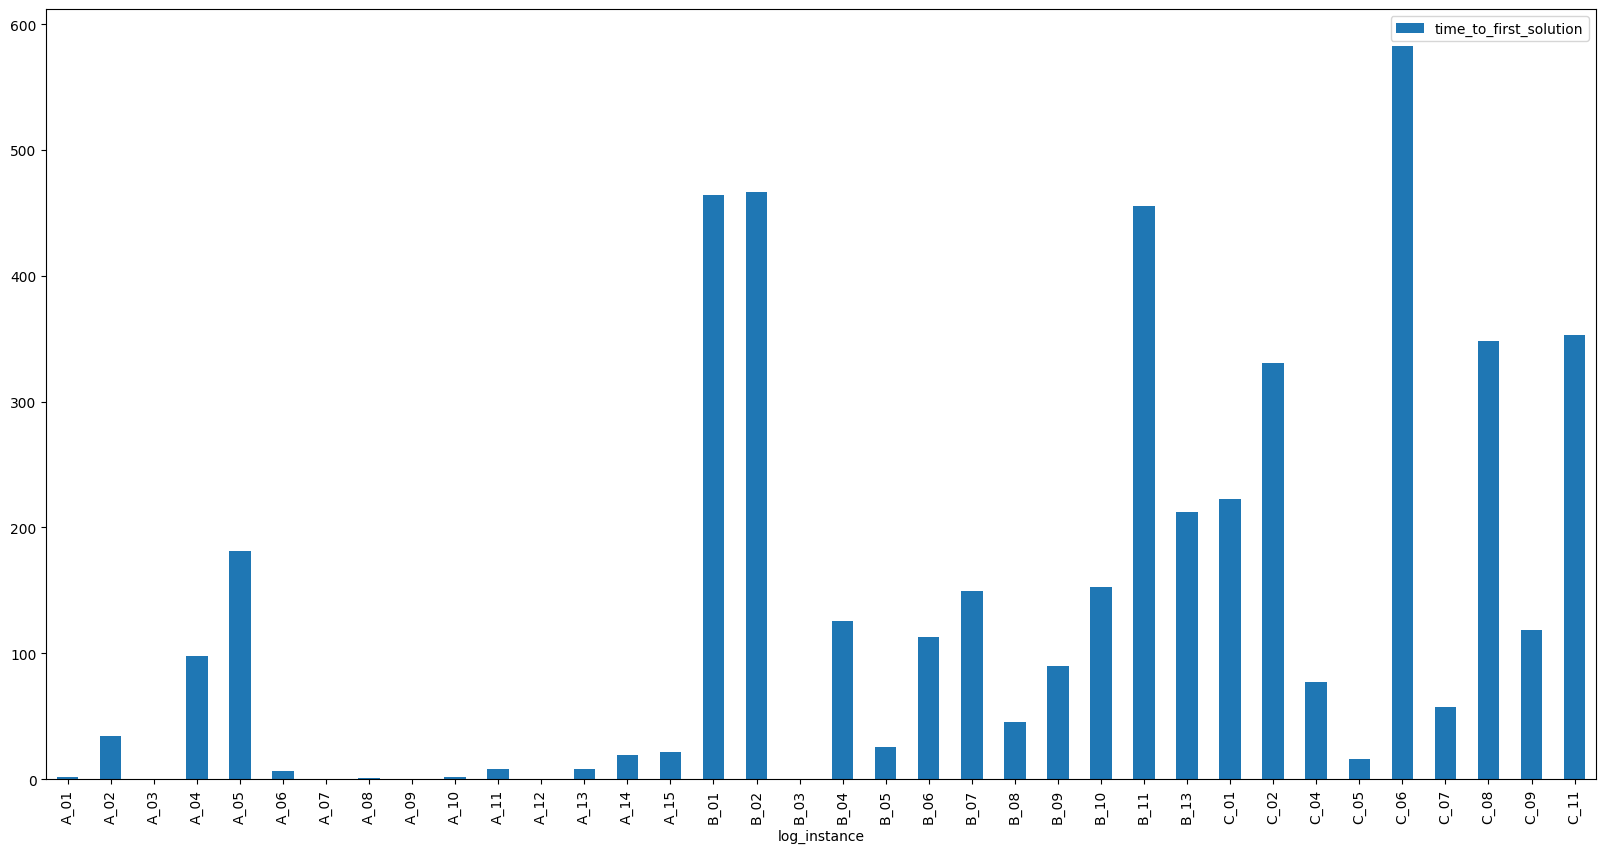

In [69]:
#print the time neeeded to find the firs toslution
results_900.plot(x='log_instance', y='time_to_first_solution', kind='bar', figsize=(20,10))

In [73]:
#print the percentage of difference from the first solution to the best solution found
results_900['percentage_difference_first_solution'] = (results_900['first_solution_value'] - results_900['best_solution_value'])/results_900['first_solution_value'] * 100

<Axes: xlabel='log_instance'>

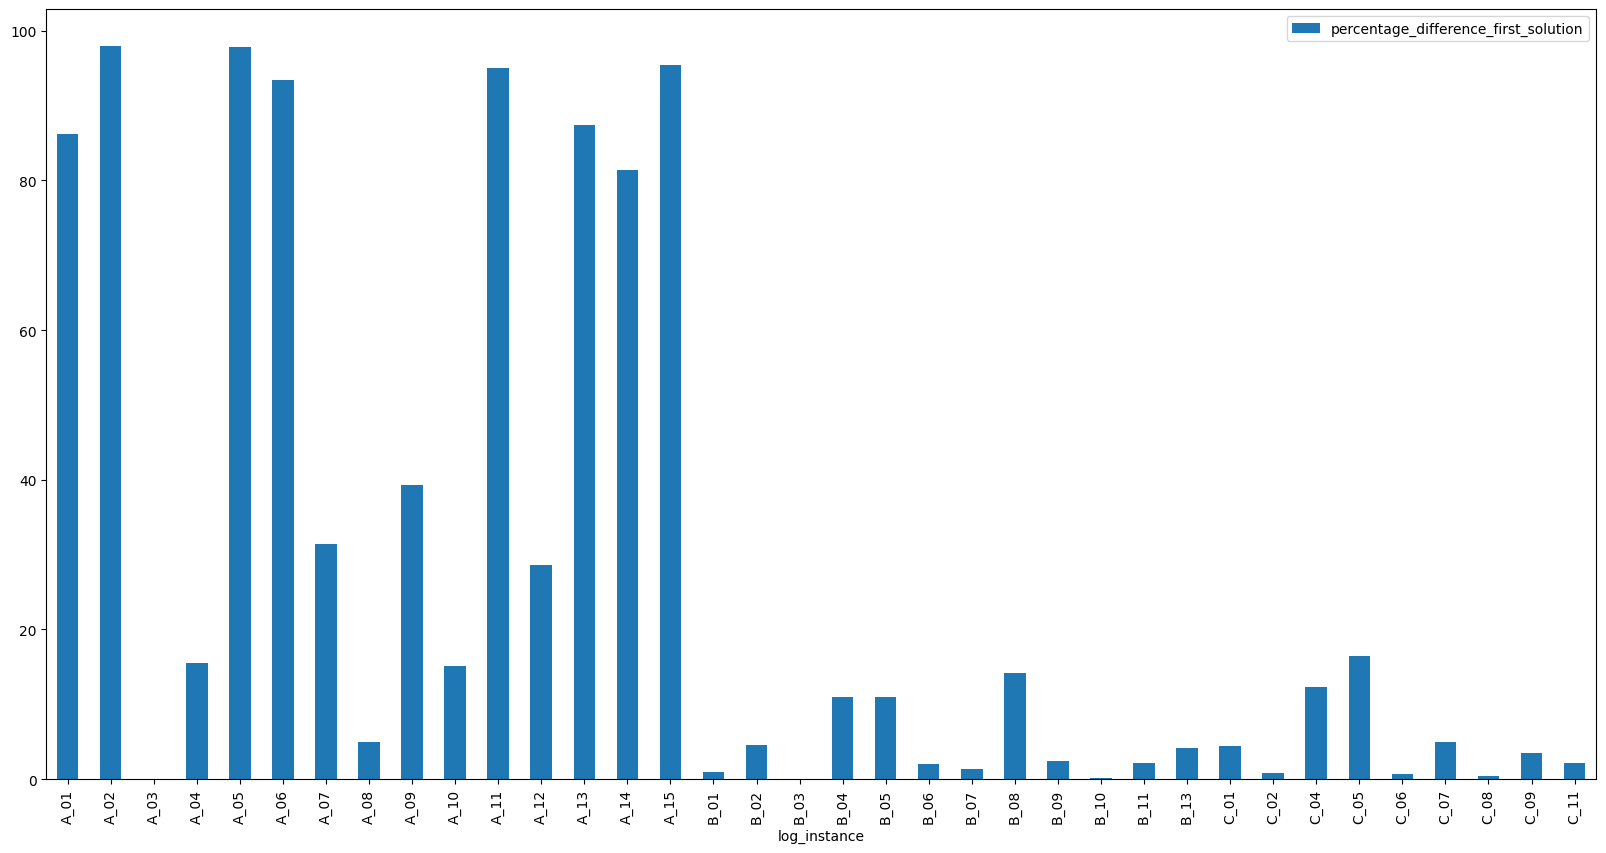

In [74]:
#plot the percentage difference for each instance
results_900.plot(x='log_instance', y='percentage_difference_first_solution', kind='bar', figsize=(20,10))

<Axes: xlabel='log_instance'>

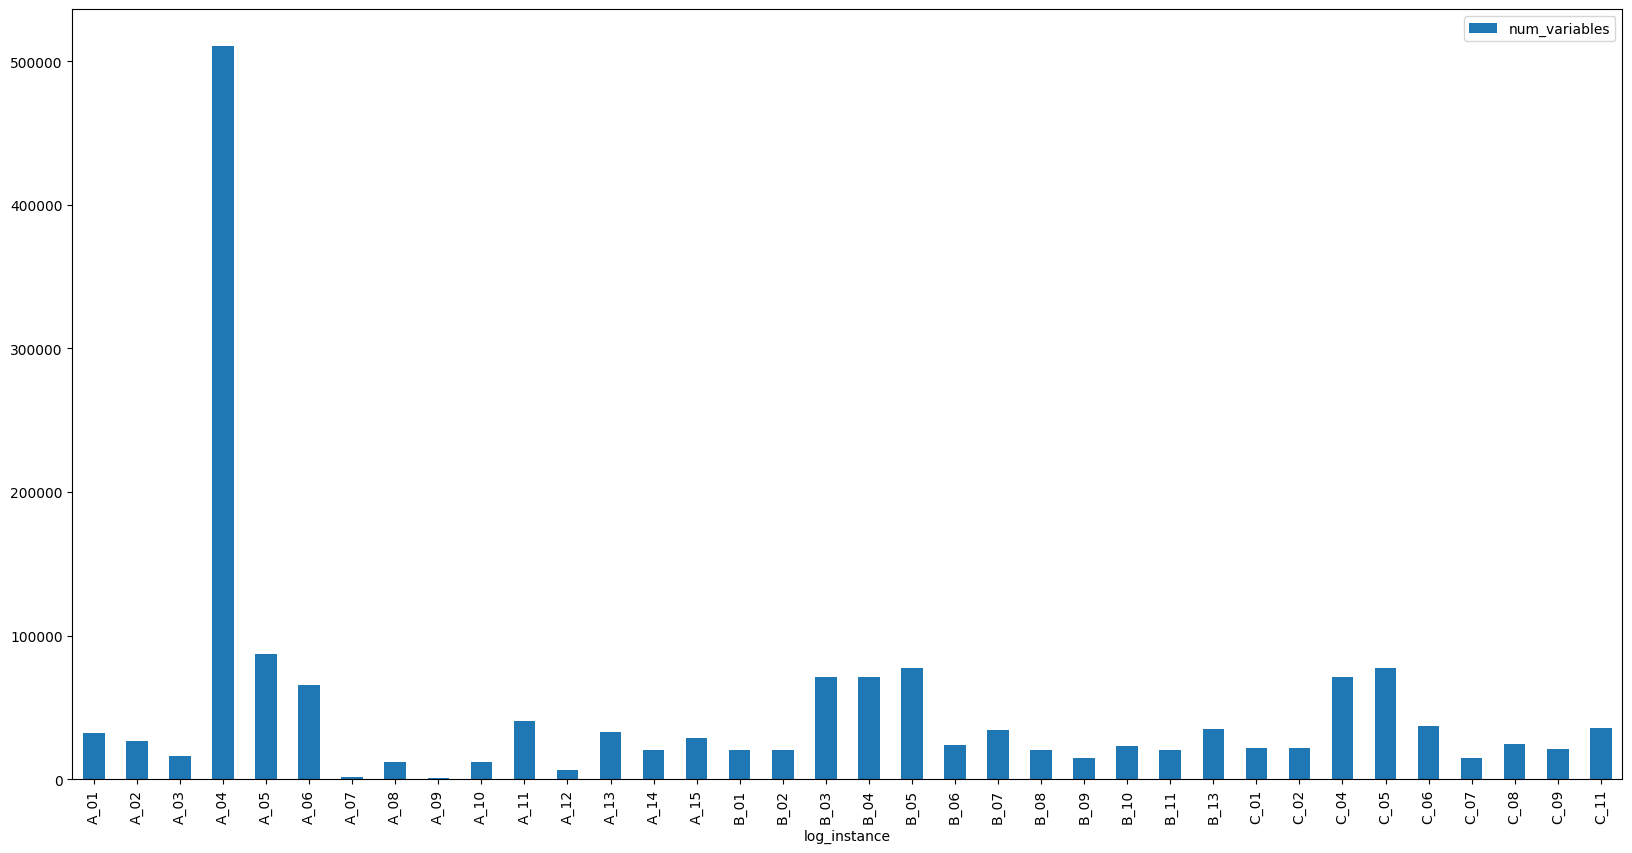

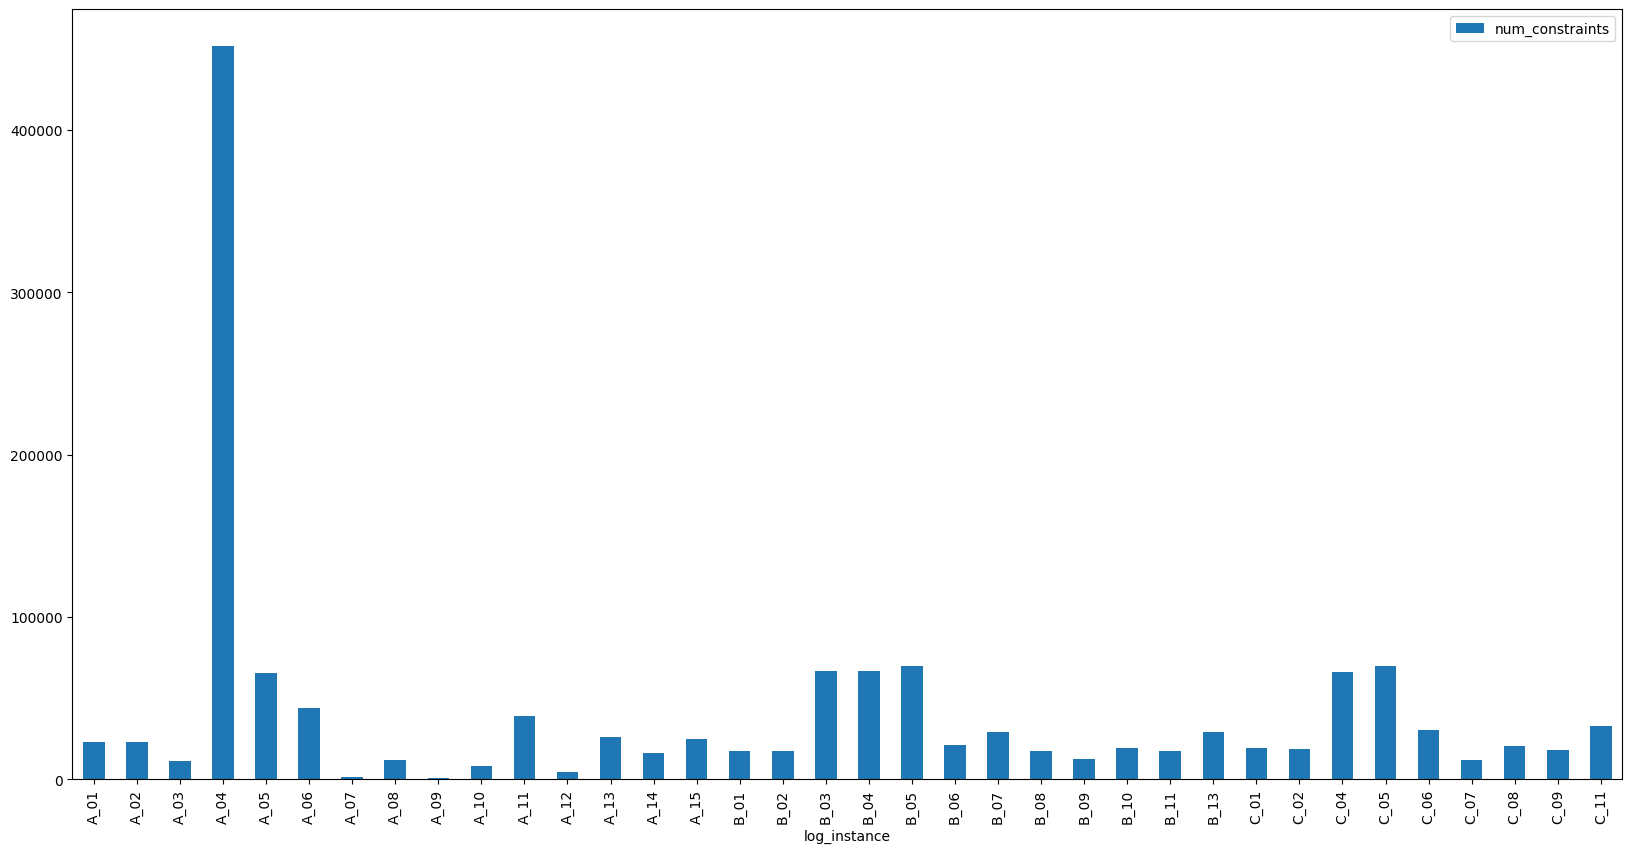

In [81]:
#plot the number of variables and constraints for each instance
results_900.plot(x='log_instance', y='num_variables', kind='bar', figsize=(20,10))
results_900.plot(x='log_instance', y='num_constraints', kind='bar', figsize=(20,10))